In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
x = df.loc[:, 'YearsExperience'].values
y = df.loc[:, 'Salary'].values

xp = torch.from_numpy(x).float().cuda()
yp = torch.from_numpy(y).float().cuda()

In [4]:
print(xp)
print(yp)

tensor([ 1.1000,  1.3000,  1.5000,  2.0000,  2.2000,  2.9000,  3.0000,  3.2000,
         3.2000,  3.7000,  3.9000,  4.0000,  4.0000,  4.1000,  4.5000,  4.9000,
         5.1000,  5.3000,  5.9000,  6.0000,  6.8000,  7.1000,  7.9000,  8.2000,
         8.7000,  9.0000,  9.5000,  9.6000, 10.3000, 10.5000], device='cuda:0')
tensor([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,  54445.,
         64445.,  57189.,  63218.,  55794.,  56957.,  57081.,  61111.,  67938.,
         66029.,  83088.,  81363.,  93940.,  91738.,  98273., 101302., 113812.,
        109431., 105582., 116969., 112635., 122391., 121872.], device='cuda:0')


In [5]:
xp = xp.view(30,1)
yp = yp.view(30,1)

In [6]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [7]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.02 
epochs = 25

model = linearRegression(inputDim, outputDim).cuda()

In [8]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [9]:
losses = []
final_loss= 0
for epoch in range(epochs):
    
    # get output from the model, given the inputs
    y_pred = model(xp)

    # get loss for the predicted output
    loss = criterion(y_pred, yp)
    
    losses.append(loss.item())
    
    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get gradients w.r.t to parameters
    loss.backward()
    
    final_loss = loss.item()

    # update parameters
    optimizer.step()
    
    print('epoch: ', epoch, ' , loss: ', loss.item())

epoch:  0  , loss:  6503684608.0
epoch:  1  , loss:  1568070144.0
epoch:  2  , loss:  465957984.0
epoch:  3  , loss:  218660512.0
epoch:  4  , loss:  161994224.0
epoch:  5  , loss:  147860208.0
epoch:  6  , loss:  143235248.0
epoch:  7  , loss:  140755376.0
epoch:  8  , loss:  138778256.0
epoch:  9  , loss:  136937232.0
epoch:  10  , loss:  135150144.0
epoch:  11  , loss:  133398280.0
epoch:  12  , loss:  131677088.0
epoch:  13  , loss:  129985128.0
epoch:  14  , loss:  128321752.0
epoch:  15  , loss:  126686424.0
epoch:  16  , loss:  125078648.0
epoch:  17  , loss:  123497928.0
epoch:  18  , loss:  121943888.0
epoch:  19  , loss:  120416016.0
epoch:  20  , loss:  118913896.0
epoch:  21  , loss:  117437072.0
epoch:  22  , loss:  115985168.0
epoch:  23  , loss:  114557696.0
epoch:  24  , loss:  113154288.0


In [31]:
range(epochs)

range(0, 25)

Text(0.5, 0, 'epochs')

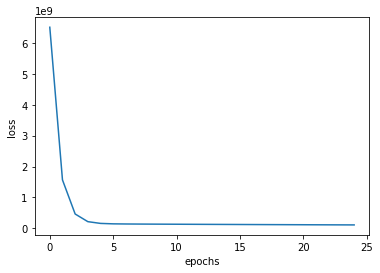

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epochs')

In [11]:
final_loss

113154288.0

In [21]:
y_pred = model(xp)

Text(0, 0.5, 'salary')

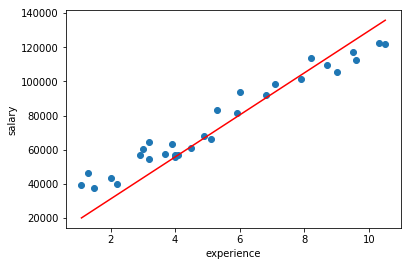

In [29]:
plt.scatter(xp.cpu(),yp.cpu())
plt.plot(xp.cpu(),y_pred.detach().cpu(),'r')
plt.xlabel('experience')
plt.ylabel('salary')